In [1]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [4]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [5]:
features = df.columns
features

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Based on this information, we have a clean dataset with no missing values.

In [6]:
print(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


This distribution indicates that this dataset has imbalanced classes, where Class 0 (non-churned) significantly outnumbers Class 1 (churned). 

# Let's clean this data

In [7]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
features = df.columns
features

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
df.shape

(10000, 11)

In [10]:
unique_geography= df["Geography"].unique()
unique_geography

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
unique_product= df["NumOfProducts"].unique()
unique_product

array([1, 3, 2, 4], dtype=int64)

In [12]:
unique_tenure= df["Tenure"].unique()
unique_tenure

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

## Data Visualisation

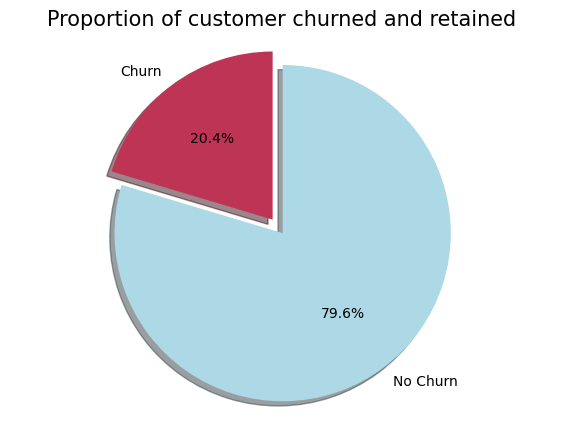

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
labels = 'Churn', 'No Churn'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
colors = ['#be3455', 'lightblue']
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

**Continuous Features**

In [14]:
import plotly as py
import numpy as np

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

def plot_histograms(columns):
    # Create subplots with the given number of rows and columns
    fig = make_subplots(rows=len(columns), cols=1, subplot_titles=columns)

    for i, column in enumerate(columns, 1):
        # Trace for Churn Customers
        trace1 = go.Histogram(
            x=df[df["Exited"] == 1][column],
            histnorm="percent",  # Normalize to represent percentage
            name="Churn Customers",
            marker=dict(color="rgba(255, 0, 0, 0.7)", line=dict(width=0.5, color="black")),
            opacity=0.9,
            legendgroup='group'
        )

        # Trace for Non-Churn Customers
        trace2 = go.Histogram(
            x=df[df["Exited"] == 0][column],
            histnorm="percent",  # Normalize to represent percentage
            name="Non-Churn customers",
            marker=dict(color="rgba(0, 0, 255, 0.7)", line=dict(width=0.5, color="black")),
            opacity=0.9,
            legendgroup='group'
        )

        # Add traces to subplots
        fig.add_trace(trace1, row=i, col=1)
        fig.add_trace(trace2, row=i, col=1)

        # Update layout settings for each subplot
        fig.update_xaxes(title_text=column, row=i, col=1)
        fig.update_yaxes(title_text="percent", row=i, col=1)

    # Update layout settings for the entire figure
    fig.update_layout(
        title="Distribution of Various Features in Customer Attrition",
        height=len(columns) * 300,  # Adjust the height based on the number of subplots
        showlegend=False,
        plot_bgcolor="white",
        paper_bgcolor="white"
    )

    # Use pyo.plot to display the interactive plot
    fig.show()

# Example usage
columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure','NumOfProducts']
plot_histograms(columns_to_plot)



Customers with a credit score lower than 400 are likely to churn

customers aged between 40 and 50 are most likely to churn

the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

**Categorical features**

In [15]:
columns_to_plot = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']
plot_histograms(columns_to_plot)

The proportion of female customers churning is also greater than that of male customers

Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

**Correlation**

In [16]:
df[df.columns].corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

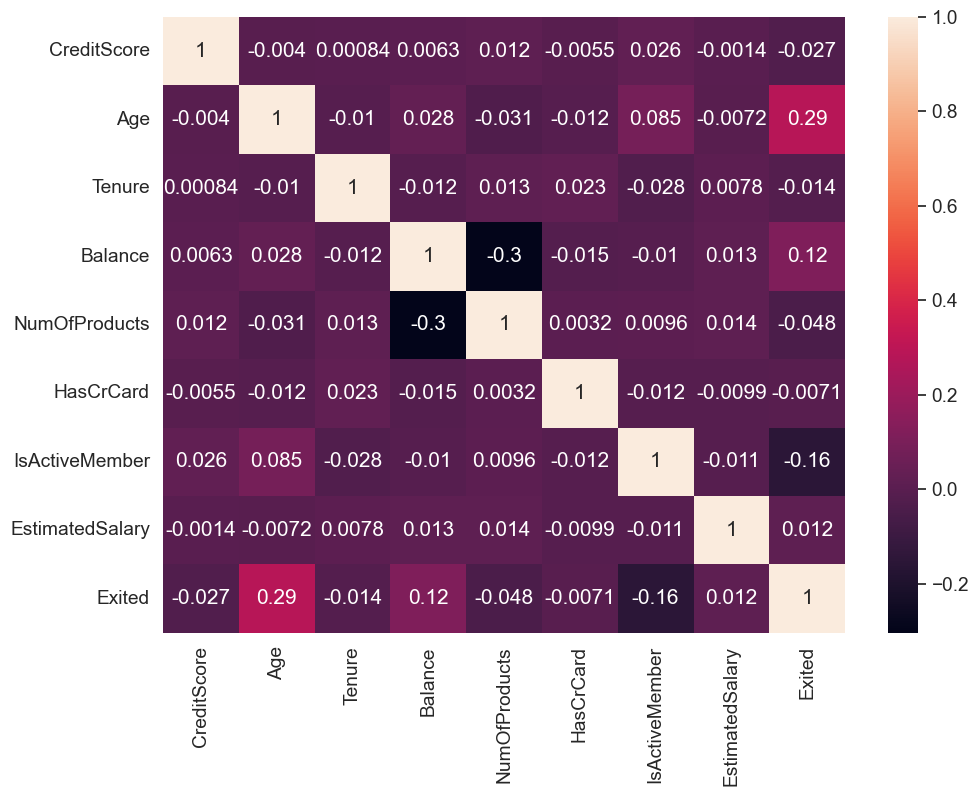

In [17]:
# Visualization of the correlation matrix using heatmap plot
sns.set()
sns.set(font_scale = 1.25)
plt.subplots(figsize=(11,8))
sns.heatmap(df[df.columns].corr(), annot = True)
plt.show()

**CreditScore and Age:** The correlation between CreditScore and Age is very weak (close to zero), suggesting a minimal linear relationship between the credit score and the age of the customers.

**Balance and NumOfProducts:** There is a notable negative correlation between Balance and NumOfProducts (-0.304), indicating that as the number of products increases, the account balance tends to decrease.

**Age and IsActiveMember:** There is a positive correlation between Age and IsActiveMember (0.085), suggesting that older customers are more likely to be active members.

**Age and Exited:** There is a moderate positive correlation between Age and Exited (0.285), indicating that older customers are more likely to churn.

**IsActiveMember and Exited:** There is a negative correlation between IsActiveMember and Exited (-0.156), suggesting that active members are less likely to churn.

**Gender and Exited:** There is a negative correlation between Gender and Exited (-0.106), indicating a weak negative relationship. However, correlation with binary variables like gender may not provide strong insights.

**Balance and Exited:** There is a positive correlation between Balance and Exited (0.118), suggesting that customers with higher balances are slightly more likely to churn.



**The relationship between the variables**

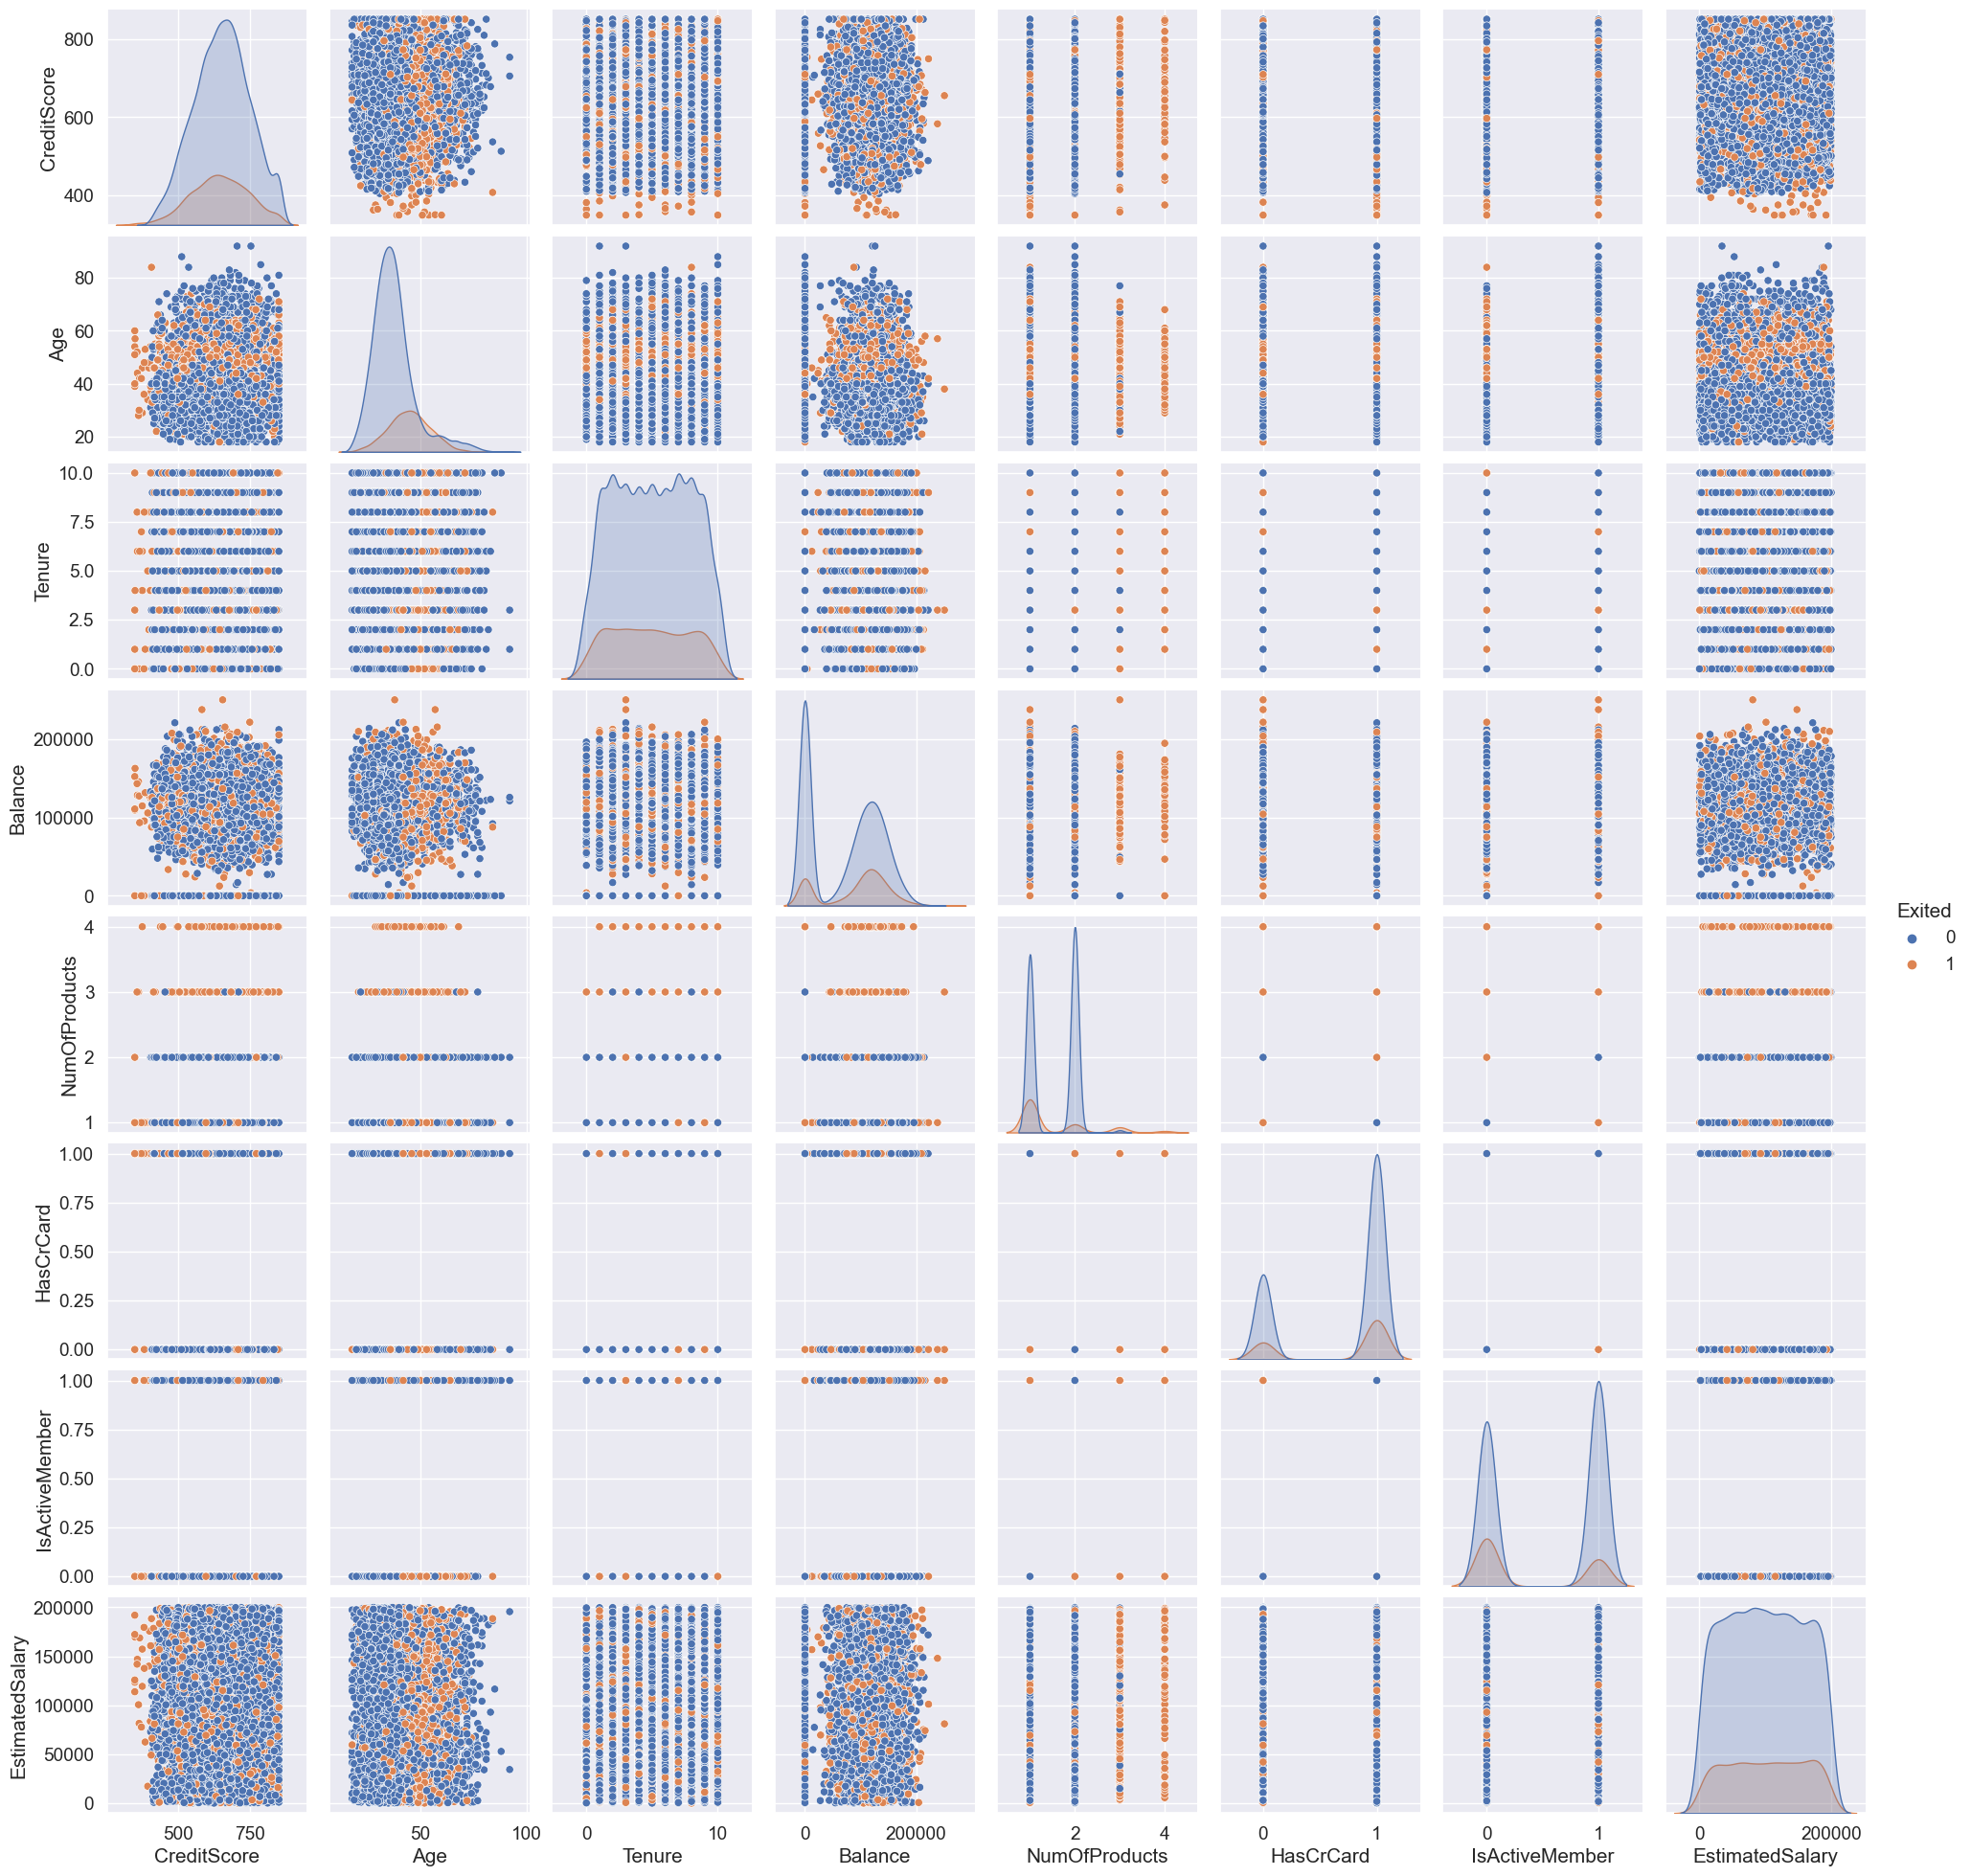

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a pair plot
sns.pairplot(df, diag_kind='kde', hue='Exited')
plt.show()


## Encoding categorical variables

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "Gender" column by labelEncoder
df["Gender"] = encoder.fit_transform(df["Gender"])
#one-hot encoding
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                  0                0  
1               1        112542.58       0                  0                1  
2               0        113931.57       1                  0                0  
3               0         93826.63       0                  0                0  
4               1         79084.10       0                  0                1

## Detecting and Handling Outliers

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

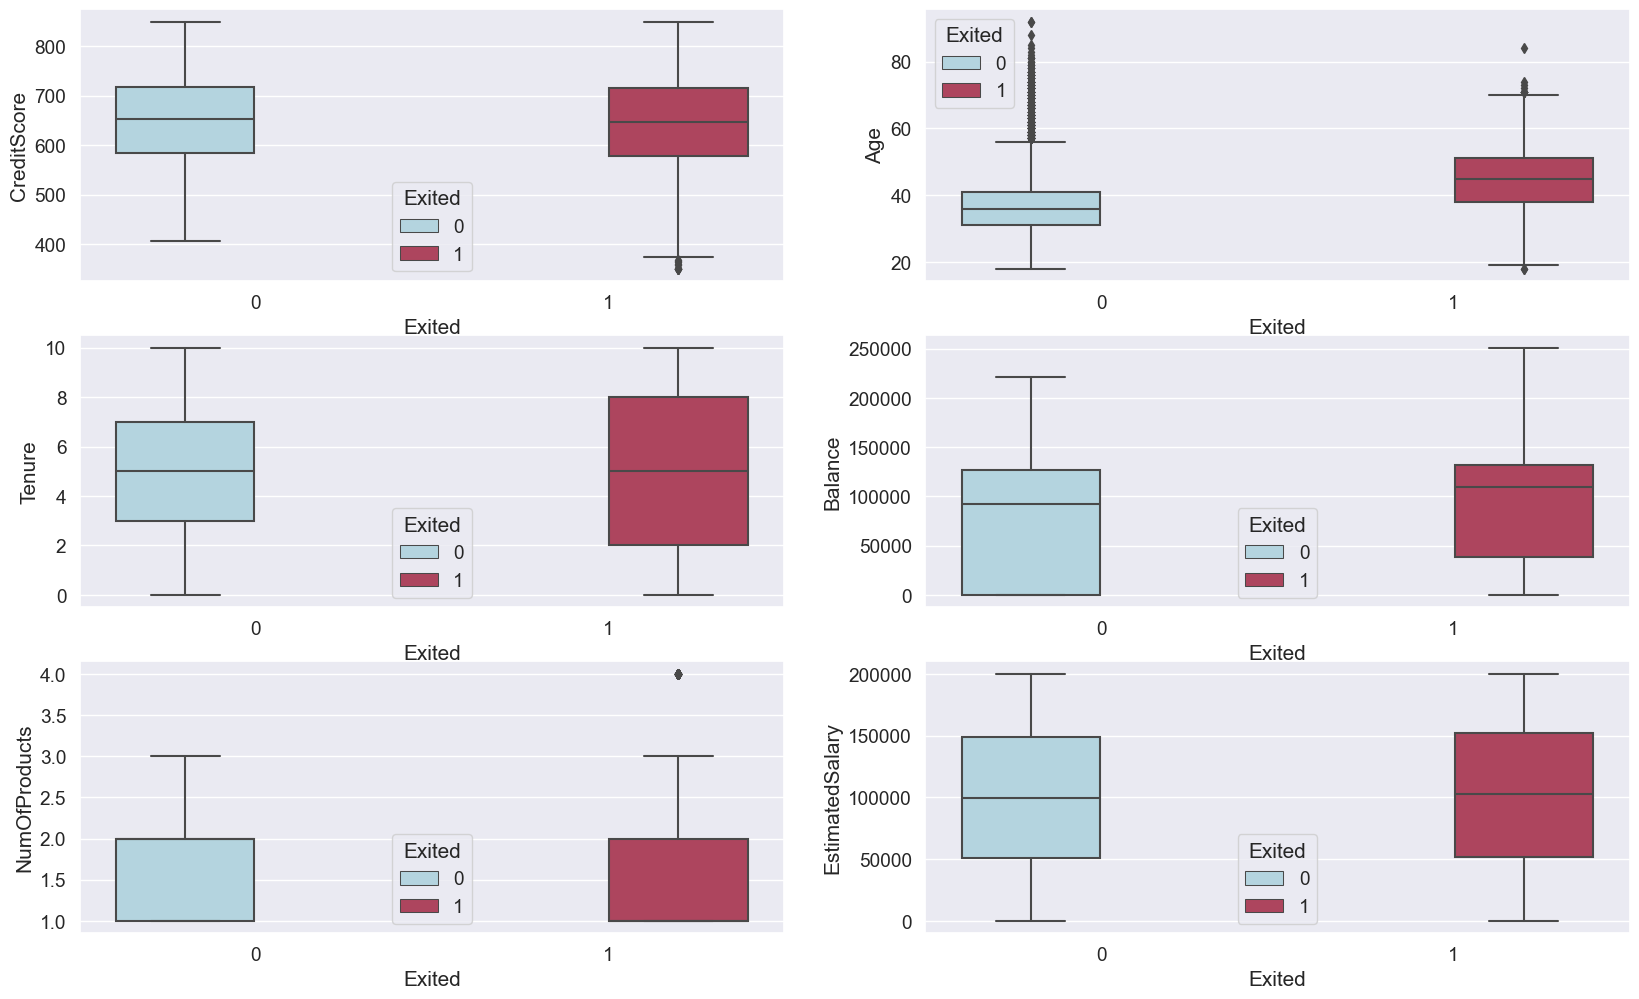

In [20]:
import matplotlib.pyplot as plt
# Define custom colors for each category
colors = {1: '#be3455', 0: 'lightblue'}
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0],palette=colors)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1],palette=colors)
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0],palette=colors)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1],palette=colors)
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0],palette=colors)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1],palette=colors)

In [21]:
def handle_outliers(df, columns):
    for column in columns:
        # Calculate the IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and handle outliers
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Specify columns for outlier handling
columns_with_outliers = ['CreditScore', 'Balance', 'Age']

# Handle outliers in the specified columns
df_cleaned = handle_outliers(df.copy(), columns_with_outliers)
df_cleaned.head()

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0       0  42.0       2       0.00              1          1   
1        608.0       0  41.0       1   83807.86              1          0   
2        502.0       0  42.0       8  159660.80              3          1   
3        699.0       0  39.0       1       0.00              2          0   
4        850.0       0  43.0       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                  0                0  
1               1        112542.58       0                  0                1  
2               0        113931.57       1                  0                0  
3               0         93826.63       0                  0                0  
4               1         79084.10       0                  0                1

In [22]:
print(df_cleaned[['CreditScore', 'Balance', 'Age']].describe())
print(df[['CreditScore', 'Balance', 'Age']].describe())

        CreditScore        Balance           Age
count  10000.000000   10000.000000  10000.000000
mean     650.561300   76485.889288     38.660800
std       96.558702   62397.405202      9.746704
min      383.000000       0.000000     18.000000
25%      584.000000       0.000000     32.000000
50%      652.000000   97198.540000     37.000000
75%      718.000000  127644.240000     44.000000
max      850.000000  250898.090000     62.000000
        CreditScore        Balance           Age
count  10000.000000   10000.000000  10000.000000
mean     650.528800   76485.889288     38.921800
std       96.653299   62397.405202     10.487806
min      350.000000       0.000000     18.000000
25%      584.000000       0.000000     32.000000
50%      652.000000   97198.540000     37.000000
75%      718.000000  127644.240000     44.000000
max      850.000000  250898.090000     92.000000


## Split the data

In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the column you're predicting
X = df.drop('Exited', axis=1)
y = df['Exited']

# Display the distribution of the original target variable
print("Original Distribution:")
print(y.value_counts(normalize=True))

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Display the distribution of the target variable in the training set
print("\nTraining Set Distribution:")
print(y_train.value_counts(normalize=True))

# Display the distribution of the target variable in the test set
print("\nTest Set Distribution:")
print(y_test.value_counts(normalize=True))


Original Distribution:
0    0.7963
1    0.2037
Name: Exited, dtype: float64

Training Set Distribution:
0    0.79625
1    0.20375
Name: Exited, dtype: float64

Test Set Distribution:
0    0.7965
1    0.2035
Name: Exited, dtype: float64


it looks like stratification is working effictively

## Scaling using standardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your feature matrices
# You can choose which columns to scale based on your requirements

# List of numerical columns to scale
continuous_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = X_train.copy()
X_train[continuous_var] = scaler.fit_transform(X_train[continuous_var])

# Transform the test data using the same scaler
X_test = X_test.copy()
X_test[continuous_var] = scaler.transform(X_test[continuous_var])

print(X_train.head())
print(X_test.head())


      CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
2151     1.058568       1  1.715086  0.684723 -1.226059      -0.910256   
8392     0.913626       1 -0.659935 -0.696202  0.413288      -0.910256   
5006     1.079274       0 -0.184931 -1.731895  0.601687       0.808830   
4117    -0.929207       1 -0.184931 -0.005739 -1.226059       0.808830   
7182     0.427035       1  0.955079  0.339492  0.548318       0.808830   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
2151          1               0         1.042084                  0   
8392          1               0        -0.623556                  1   
5006          1               1         0.308128                  1   
4117          1               0        -0.290199                  0   
7182          0               1         0.135042                  1   

      Geography_Spain  
2151                0  
8392                0  
5006                0  
4117                0  
7182    

## Model Training

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_mod = LogisticRegression(
    penalty='l2',           # Regularization type ('l1' or 'l2')
    dual=False,             # Dual or primal formulation (typically set to False)
    tol=0.0001,             # Tolerance for stopping criteria
    C=1.0,                  # Inverse of regularization strength (smaller values specify stronger regularization)
    fit_intercept=True,      # Whether to calculate the intercept for this model
    intercept_scaling=1,    # Useful only when the solver is 'liblinear'
    class_weight=None,      # Weights associated with classes (useful for imbalanced datasets)
    random_state=42,      # Seed for random number generation
    solver='liblinear',     # Algorithm to use in the optimization problem ('liblinear' is suitable for small datasets)
    max_iter=100,           # Maximum number of iterations for the solver to converge
    multi_class='ovr',      # Strategy for handling multiple classes ('ovr' for one-vs-rest)
    verbose=2               # Verbosity level (higher values give more information during training)
)

# Fitting the model with training data
lr_mod.fit(X_train, y_train)
# Compute the model accuracy on the given test data and labels
lr_acc = lr_mod.score(X_test, y_test)

# Return probability estimates for the test data
#test_labels = lr_mod.predict(X_test)
test_labels = lr_mod.predict_proba(np.array(X_test.values))[:,1]

y_pred_lr = lr_mod.predict(X_test)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

lr_report = classification_report(y_test, y_pred_lr, output_dict=True)


[LibLinear]

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [26]:
from sklearn.neighbors import KNeighborsClassifier
# Initialization of the KNN
knn_mod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2,
                             metric = 'minkowski', metric_params = None)
# Fitting the model with training data 
knn_mod.fit(X_train, y_train)
# Compute the model accuracy on the given test data and labels
knn_acc = knn_mod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knn_mod.predict_proba(np.array(X_test.values))[:,1]

y_pred_knn = knn_mod.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will beco

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Initialization of the Random Forest model
rf_mod = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=42)
# Fitting the model with training data 
rf_mod.fit(X_train, y_train)
# Compute the model accuracy on the given test data and labels
rf_acc = rf_mod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rf_mod.predict_proba(np.array(X_test.values))[:,1]

y_pred_rf = rf_mod.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [28]:
from sklearn.ensemble import AdaBoostClassifier
# Initialization of the AdaBoost model
ada_mod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0,random_state=42)
# Fitting the model with training data 
ada_mod.fit(X_train, y_train)
# Compute the model accuracy on the given test data and labels
ada_acc = ada_mod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = ada_mod.predict_proba(np.array(X_test.values))[:,1]

y_pred_ada = ada_mod.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

ada_report = classification_report(y_test, y_pred_ada, output_dict=True)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Initialization of the XGBoost model
xgbMod = XGBClassifier(n_estimators=200,
    objective='binary:logistic',  # For binary classification
    learning_rate=0.1,  # Learning rate
    max_depth=3,  # Maximum depth of a tree
    random_state=42)

# Fitting the model with training data
xgbMod.fit(X_train, y_train)

# Compute the model accuracy on the given test data and labels
xgb_acc = xgbMod.score(X_test, y_test)

# Return probability estimates for the test data
test_labels_xgb = xgbMod.predict_proba(np.array(X_test.values))[:, 1]

y_pred_xgb = xgbMod.predict(X_test)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
xgb_roc_auc = roc_auc_score(y_test, test_labels_xgb, average='macro')

xgb_report = classification_report(y_test, y_pred_xgb)


In [30]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'XGBoost', 'Random Forest']
accuracy = [knn_acc, lr_acc, ada_acc, xgb_acc, rf_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, xgb_roc_auc, rf_roc_auc]
d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics



accuracy   roc_auc
KNN                    0.8430  0.791642
Logistic Regression    0.8085  0.774801
AdaBoost               0.8550  0.850303
XGBoost                0.8660  0.867205
Random Forest          0.8460  0.817883

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



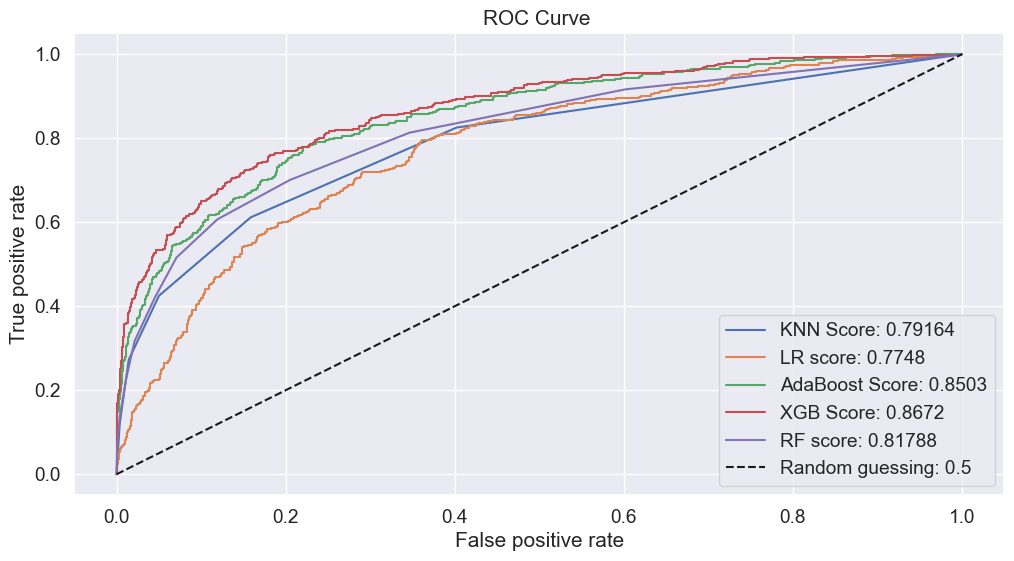

In [31]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_mod.predict_proba(np.array(X_test.values))[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_mod.predict_proba(np.array(X_test.values))[:,1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_mod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, xgbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_mod.predict_proba(np.array(X_test.values))[:,1])
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'XGB Score: ' + str(round(xgb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

all_y_preds = [y_pred_knn, y_pred_lr, y_pred_ada, y_pred_xgb, y_pred_rf]
df = pd.DataFrame(models)

# Add new columns for classification report and confusion matrix
#df['Classification Report'] = [classification_report(y_test, y_pred, output_dict=True) for y_pred in all_y_preds]
df['Confusion Matrix'] = [confusion_matrix(y_test, y_pred) for y_pred in all_y_preds]
# Extract precision, recall, and f1-score from the Classification Report
# Add new columns for precision, recall, and f1-score
df['Precision'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[0] for y_pred in all_y_preds]
df['Recall'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[1] for y_pred in all_y_preds]
df['F1-Score'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[2] for y_pred in all_y_preds]


# Display the DataFrame
print(df)



                     0          Confusion Matrix  Precision    Recall  \
0                  KNN  [[1513, 80], [234, 173]]   0.683794  0.425061   
1  Logistic Regression   [[1541, 52], [331, 76]]   0.593750  0.186732   
2             AdaBoost  [[1517, 76], [214, 193]]   0.717472  0.474201   
3              XGBoost  [[1538, 55], [213, 194]]   0.779116  0.476658   
4        Random Forest  [[1521, 72], [236, 171]]   0.703704  0.420147   

   F1-Score  
0  0.524242  
1  0.284112  
2  0.571006  
3  0.591463  
4  0.526154  


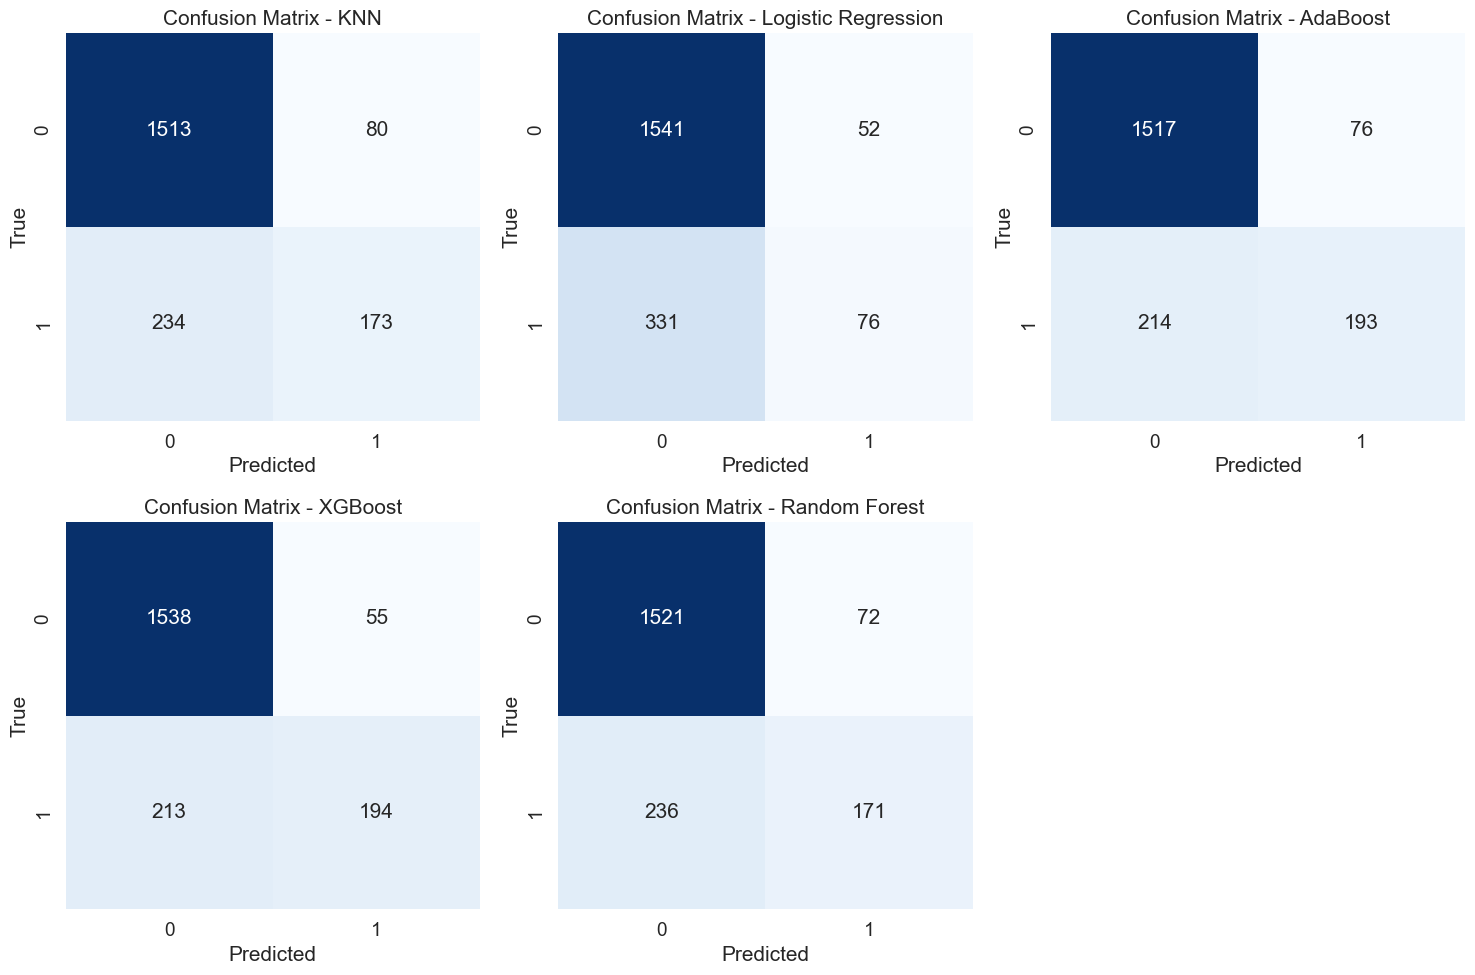

In [33]:
# Visualize confusion matrices
plt.figure(figsize=(15, 10))

for i, model in enumerate(models):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(y_test, all_y_preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

the confusion matrix shows that the model can't classify the class 1 correctly

## Oversamplin Using SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [35]:
X_res.head()

CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0     1.058568       1  1.715086  0.684723 -1.226059      -0.910256   
1     0.913626       1 -0.659935 -0.696202  0.413288      -0.910256   
2     1.079274       0 -0.184931 -1.731895  0.601687       0.808830   
3    -0.929207       1 -0.184931 -0.005739 -1.226059       0.808830   
4     0.427035       1  0.955079  0.339492  0.548318       0.808830   

   HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
0          1               0         1.042084                  0   
1          1               0        -0.623556                  1   
2          1               1         0.308128                  1   
3          1               0        -0.290199                  0   
4          0               1         0.135042                  1   

   Geography_Spain  
0                0  
1                0  
2                0  
3                0  
4                0

In [36]:
y_res.head()

0    1
1    1
2    0
3    0
4    0
Name: Exited, dtype: int64

In [37]:
y_res.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [38]:
# Find the indices of the new rows
new_rows_indices = set(X_res.index) - set(X_train.index)

# Extract the new rows
new_rows = X_res.loc[new_rows_indices]

# Display the new rows
print(len(new_rows))
print(new_rows.head())

4740
      CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
8197    -0.412876       0  2.224391 -0.315999  0.229419       0.808830   
6        1.358805       1 -0.469934  1.375185 -1.226059      -0.910256   
8        1.089627       1  0.195072 -1.041433  0.771424       0.808830   
9        0.354564       1 -0.469934  0.339492  0.110486      -0.910256   
13       0.240681       0 -1.134940 -0.350971  0.564813      -0.910256   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
8197          1               0         0.103379                  1   
6             1               0         1.452783                  0   
8             0               1        -0.918128                  1   
9             0               0        -1.570995                  0   
13            0               1        -1.355356                  1   

      Geography_Spain  
8197                0  
6                   0  
8                   0  
9                   1  
13 

C:\Users\New_User\AppData\Local\Temp\ipykernel_592\4164089963.py:5: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [39]:
# Initialization of the Random Forest model
rf_mod = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=42)
# Fitting the model with training data 
rf_mod.fit(X_res, y_res)
# Compute the model accuracy on the given test data and labels
rf_acc = rf_mod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rf_mod.predict_proba(np.array(X_test.values))[:,1]

y_pred_rf = rf_mod.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [40]:
# Initialization of the AdaBoost model
ada_mod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0,random_state=42)
# Fitting the model with training data 
ada_mod.fit(X_res, y_res)
# Compute the model accuracy on the given test data and labels
ada_acc = ada_mod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = ada_mod.predict_proba(np.array(X_test.values))[:,1]

y_pred_ada = ada_mod.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

ada_report = classification_report(y_test, y_pred_ada, output_dict=True)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Initialization of the XGBoost model
xgbMod = XGBClassifier(n_estimators=200,
    objective='binary:logistic',  # For binary classification
    learning_rate=0.1,  # Learning rate
    max_depth=3,  # Maximum depth of a tree
    random_state=42)

# Fitting the model with training data
xgbMod.fit(X_res, y_res)

# Compute the model accuracy on the given test data and labels
xgb_acc = xgbMod.score(X_test, y_test)

# Return probability estimates for the test data
test_labels_xgb = xgbMod.predict_proba(np.array(X_test.values))[:, 1]

y_pred_xgb = xgbMod.predict(X_test)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
xgb_roc_auc = roc_auc_score(y_test, test_labels_xgb, average='macro')

xgb_report = classification_report(y_test, y_pred_xgb)


In [42]:
models = [ 'AdaBoost', 'XGBoost', 'Random Forest']
accuracy = [ ada_acc, xgb_acc, rf_acc]
roc_auc = [ada_roc_auc, xgb_roc_auc, rf_roc_auc]
d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

accuracy   roc_auc
AdaBoost          0.819  0.856299
XGBoost           0.853  0.873930
Random Forest     0.827  0.826033

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



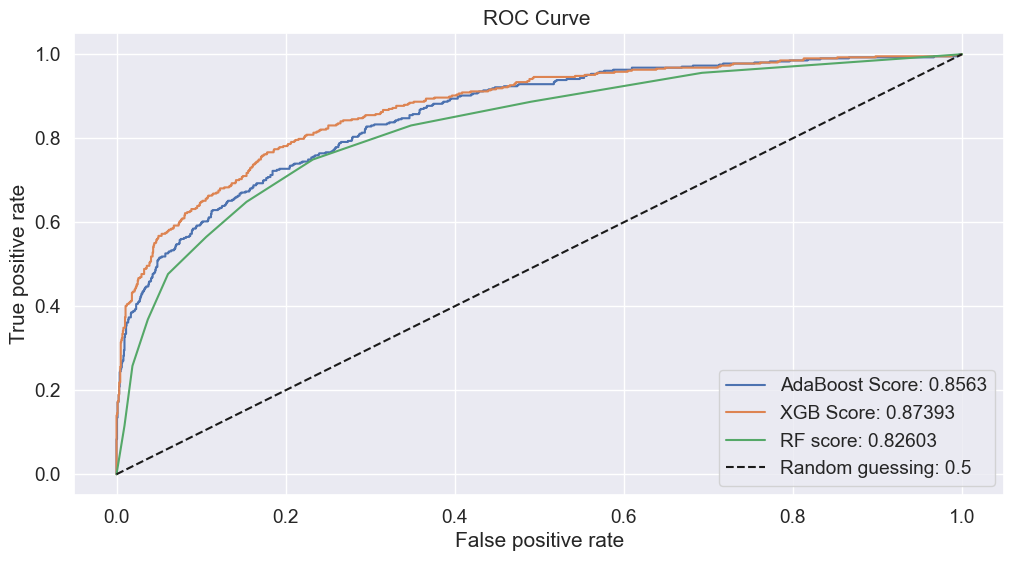

In [43]:
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_mod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, xgbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_mod.predict_proba(np.array(X_test.values))[:,1])
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'XGB Score: ' + str(round(xgb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()


we notice that the accuracy decreased but that's common since we added more data

the roc_auc score increased which is a good sign

In [44]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

all_y_preds = [y_pred_ada, y_pred_xgb, y_pred_rf]
df = pd.DataFrame(models)

# Add new columns for classification report and confusion matrix
#df['Classification Report'] = [classification_report(y_test, y_pred, output_dict=True) for y_pred in all_y_preds]
df['Confusion Matrix'] = [confusion_matrix(y_test, y_pred) for y_pred in all_y_preds]
# Extract precision, recall, and f1-score from the Classification Report
# Add new columns for precision, recall, and f1-score
df['Precision'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[0] for y_pred in all_y_preds]
df['Recall'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[1] for y_pred in all_y_preds]
df['F1-Score'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[2] for y_pred in all_y_preds]


# Display the DataFrame
print(df)


               0           Confusion Matrix  Precision    Recall  F1-Score
0       AdaBoost  [[1371, 222], [140, 267]]   0.546012  0.656020  0.595982
1        XGBoost  [[1449, 144], [150, 257]]   0.640898  0.631450  0.636139
2  Random Forest  [[1424, 169], [177, 230]]   0.576441  0.565111  0.570720


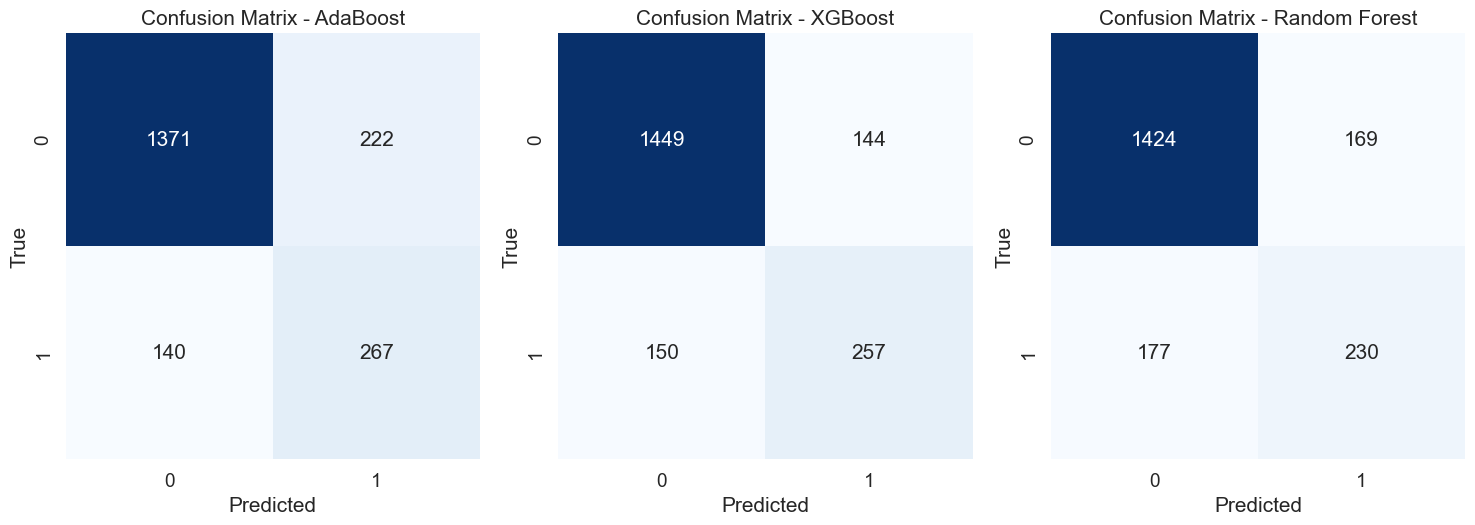

In [45]:
# Visualize confusion matrices
plt.figure(figsize=(15, 10))

for i, model in enumerate(models):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(y_test, all_y_preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

## Cross Validation

In [46]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_res = X, y_res = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_res, y_res, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [47]:
mod = [ada_mod, xgbMod, rf_mod]
cvD = cvDictGen(mod, scr = 'roc_auc')
cvD

{'AdaBoostClassifier': [0.8438160242425523, 0.00540938212632963],
 'XGBClassifier': [0.864834539686609, 0.0020305996296590806],
 'RandomForestClassifier': [0.8198290750123943, 0.011260578344934555]}

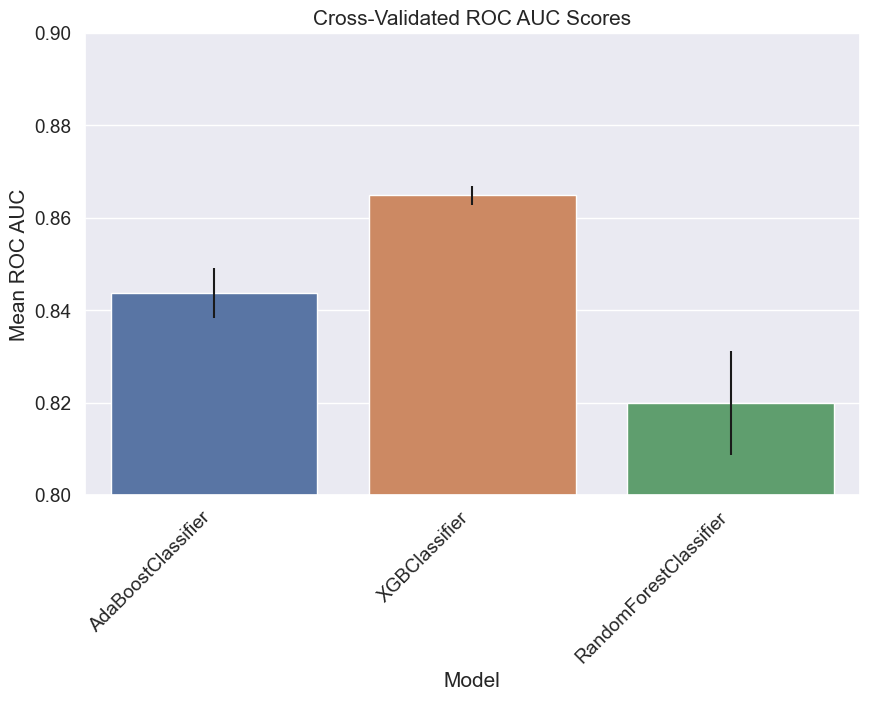

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary to a DataFrame for easier plotting
cv_df = pd.DataFrame.from_dict(cvD, orient='index', columns=['Mean ROC AUC', 'Std ROC AUC'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=cv_df.index, y='Mean ROC AUC', data=cv_df, yerr=cv_df['Std ROC AUC'], capsize=0.1)
plt.title('Cross-Validated ROC AUC Scores')
plt.xlabel('Model')
plt.ylabel('Mean ROC AUC')
plt.ylim(0.8, 0.9)  # Adjust ylim based on your data
plt.xticks(rotation=45, ha='right')
plt.show()


As we can see, in the above output, GradietBoosting and Adaboot classifier perform well. **This cross-validation score helps in order to decide which model we should select and which ones we should not go with. Based on the mean value and the standard deviation value, we can conclude that our ROC-AUC score does not deviate much, so we are not suffering from the overfitting issue.**

 ## hyperparameter tuning

In [49]:
# Import methods
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [50]:
# Possible parameters
adaHyperParams = {
    #'base_estimator':[None],
    'n_estimators': randint(10, 500),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    #'random_state': [42]
}
randomSearchAda = RandomizedSearchCV(
    estimator = ada_mod, 
    param_distributions = adaHyperParams, 
    n_iter = 5,
    scoring = 'roc_auc',
    random_state=42 )

randomSearchAda.fit(X_res, y_res)

RandomizedSearchCV(estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=42),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE8EBD7BE0>},
                   random_state=42, scoring='roc_auc')

In [51]:
# Display the best parameters and the score
randomSearchAda.best_params_, randomSearchAda.best_score_

({'learning_rate': 0.5, 'n_estimators': 445}, 0.9234021697073951)

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Possible parameters for XGBClassifier
# Possible parameters for XGBClassifier
xgbHyperParams = {
    'n_estimators': randint(10, 300),
    'learning_rate': [0.01, 0.1],
    'max_depth': randint(1, 5),
    #'random_state': [42]
}


# Create RandomizedSearchCV object
randomSearchXGB = RandomizedSearchCV(
    estimator=xgbMod,                    # Your XGBClassifier model
    param_distributions=xgbHyperParams,  # Hyperparameter grid
    n_iter=5,                           # Number of parameter settings sampled
    scoring='roc_auc',                   # Scoring metric
    random_state=42                      # Set random state for reproducibility
)

# Fit the RandomizedSearchCV object to the training data
randomSearchXGB.fit(X_res, y_res)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.1,...
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                 

In [53]:
randomSearchXGB.best_params_, randomSearchXGB.best_score_

({'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 280},
 0.8901929422898249)

In [54]:
# GradientBoosting with the optimal parameters
bestXGbModFitted = randomSearchXGB.best_estimator_.fit(X_res, y_res)
# AdaBoost with the optimal parameter
bestAdaModFitted = randomSearchAda.best_estimator_.fit(X_res, y_res)
functions = [bestXGbModFitted, bestAdaModFitted]
cvDictbestpara = cvDictGen(functions, scr = 'roc_auc')
print(cvDictbestpara)
print(cvD)

{'XGBClassifier': [0.859408519867728, 0.0023540167547914047], 'AdaBoostClassifier': [0.8456340291289198, 0.00550717382363172]}
{'AdaBoostClassifier': [0.8438160242425523, 0.00540938212632963], 'XGBClassifier': [0.864834539686609, 0.0020305996296590806], 'RandomForestClassifier': [0.8198290750123943, 0.011260578344934555]}


In [55]:
# Compute the model accuracy on the given test data and labels
xgb_acc_tun = bestXGbModFitted.score(X_test, y_test)

y_pred_xgb_tun = bestXGbModFitted.predict(X_test)

xgb_report_tun = classification_report(y_test, y_pred_xgb_tun)

# Getting the score GradientBoosting
test_labels = bestXGbModFitted.predict_proba(np.array(X_test.values))[:,1]
xgb_roc_auc_tun=roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

In [56]:
ada_acc_tun = bestAdaModFitted.score(X_test, y_test)

y_pred_ada_tun = bestAdaModFitted.predict(X_test)

ada_report_tun = classification_report(y_test, y_pred_ada_tun, output_dict=True)

test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
ada_roc_auc_score=roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



In [57]:
models = ['AdaBoost','XGBoost']
accuracy = [ ada_acc_tun, xgb_acc_tun]
roc_auc = [ ada_roc_auc_score, xgb_roc_auc_tun]
d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics_tun = pd.DataFrame(d, index = models)
print(df_metrics_tun)
print(df_metrics)

          accuracy   roc_auc
AdaBoost    0.8220  0.858865
XGBoost     0.8045  0.863518
               accuracy   roc_auc
AdaBoost          0.819  0.856299
XGBoost           0.853  0.873930
Random Forest     0.827  0.826033


In [58]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

all_y_preds = [y_pred_ada_tun, y_pred_xgb_tun]
df = pd.DataFrame(models)

# Add new columns for classification report and confusion matrix
#df['Classification Report'] = [classification_report(y_test, y_pred, output_dict=True) for y_pred in all_y_preds]
df['Confusion Matrix'] = [confusion_matrix(y_test, y_pred) for y_pred in all_y_preds]
# Extract precision, recall, and f1-score from the Classification Report
# Add new columns for precision, recall, and f1-score
df['Precision'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[0] for y_pred in all_y_preds]
df['Recall'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[1] for y_pred in all_y_preds]
df['F1-Score'] = [precision_recall_fscore_support(y_test, y_pred, average='binary')[2] for y_pred in all_y_preds]


# Display the DataFrame
print(df)


          0           Confusion Matrix  Precision    Recall  F1-Score
0  AdaBoost  [[1372, 221], [135, 272]]   0.551724  0.668305  0.604444
1   XGBoost  [[1307, 286], [105, 302]]   0.513605  0.742015  0.607035


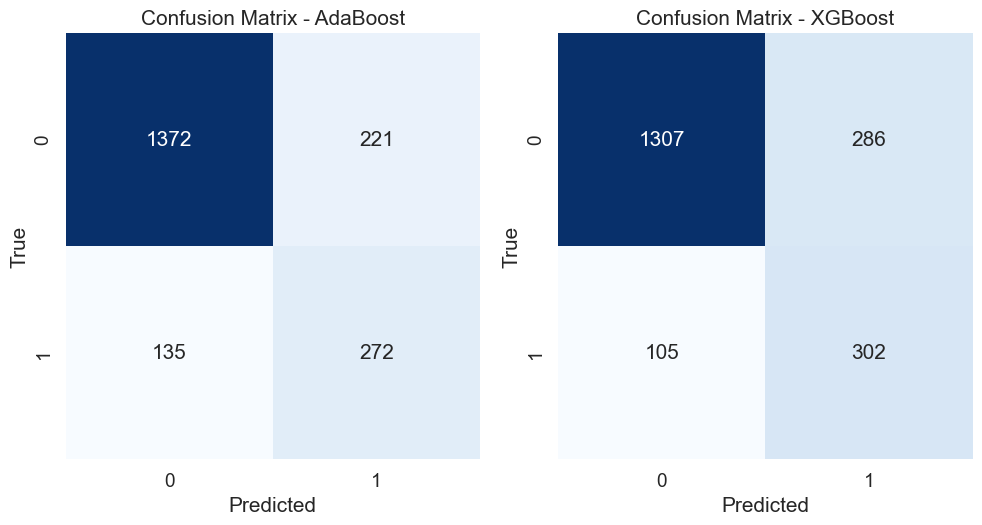

In [59]:
# Visualize confusion matrices
plt.figure(figsize=(15, 10))

for i, model in enumerate(models):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(y_test, all_y_preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

We can see in the above output that there is no such an improvement.

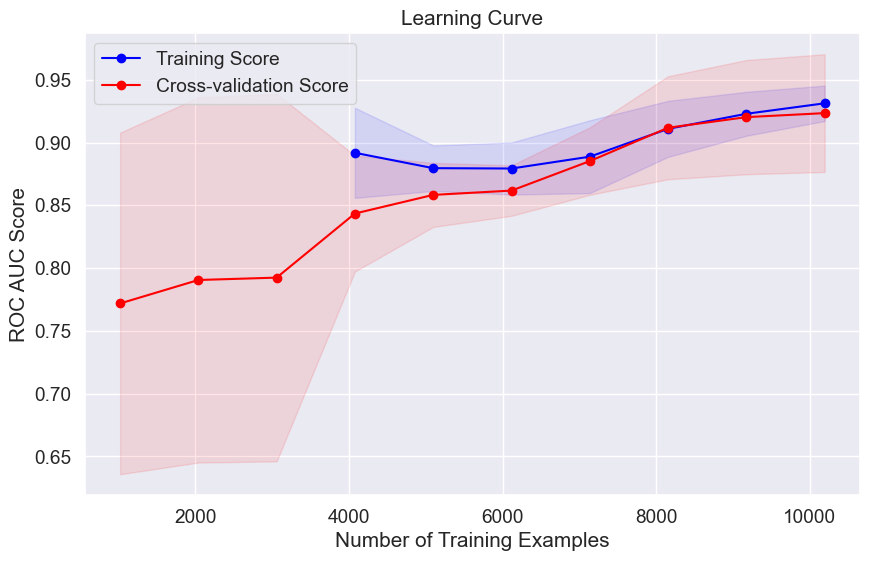

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    - estimator: The machine learning model
    - X: The feature matrix
    - y: The target variable
    - cv: Cross-validation strategy
    - train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='roc_auc', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o')
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color='blue'
    )
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation Score', color='red', marker='o')
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color='red'
    )

    plt.title('Learning Curve')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('ROC AUC Score')
    plt.legend(loc='best')
    plt.show()

# Plotting the learning curve
plot_learning_curve(bestAdaModFitted, X_res, y_res, cv=5)

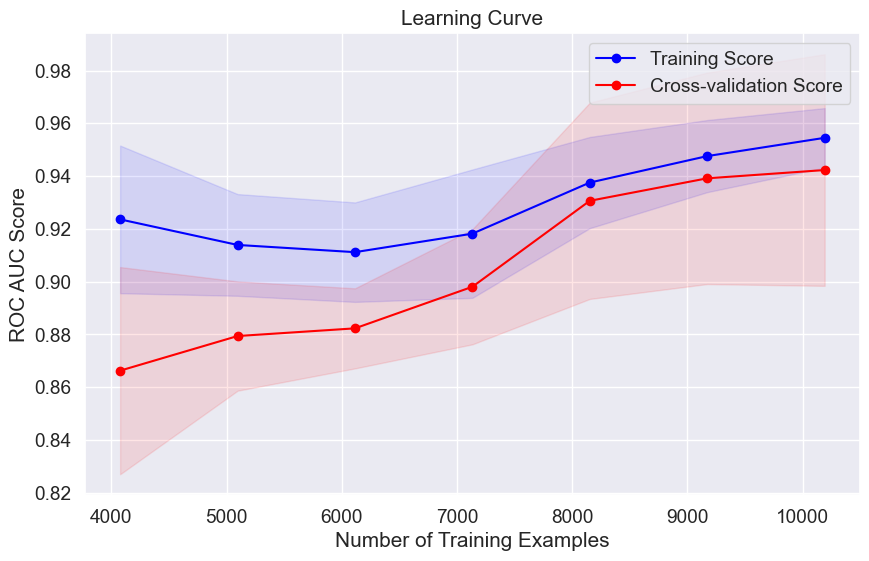

In [61]:
plot_learning_curve(xgbMod, X_res, y_res, cv=5)

## Voting 

In [62]:
# Import the voting-based ensemble model
from sklearn.ensemble import VotingClassifier
# Initialization of the model
votingMod = VotingClassifier(estimators=[('xgb', xgbMod), 
                                         ('ada', bestAdaModFitted)],
                                         voting = 'soft', weights = [1,2])
# Fitting the model
votingMod = votingMod.fit(X_res, y_res)


In [63]:
test_labels=votingMod.predict_proba(np.array(X_test))[:,1]
votingMod.score(X_test, y_test)

C:\Users\New_User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



0.853

In [64]:
# The roc_auc score
roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

0.8739779841474756

## Conclusion

87% is not a bad score, it is the best it could be based on this dataset.

Maybe a better understanding of the data will help improve this model